# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2
- umap-learn 0.5.3

In [1]:
from sklearn.datasets import fetch_covtype
covtype = fetch_covtype()

In [2]:
import random
random_numbers = random.sample(range(covtype.data.shape[0]), 1000)
sample = covtype.data[random_numbers,:]


## Actividad en clase

Clusterice el dataset usando **Kmeans**. Para esto haga lo siguiente:

- Preprocese los datos y reduzca la dimensionalidad del sample de manera que retenga el 85% de la varianza. Revise los ejemplos de la clase 2. 
- Corra kmeans con inicialización random para valores de k en el rango [5, 6, 7, 8, 9, 10]. 
- Determine el mejor valor de k según el Silhouette score promedio. Revise los ejemplos de la clase 4.
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.
- Pueden trabajar de a dos.

***Tiene hasta el final de la clase.***


# Solución

In [10]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(sample)

In [11]:
from sklearn.decomposition import PCA

def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i

In [12]:
pca = PCA(n_components=50)
pca.fit(X)
min_var(0.85,pca.explained_variance_ratio_)

16

In [13]:
pca = PCA(n_components=16)
X= pca.fit_transform(X)

For n_clusters = 5 The average silhouette_score is : 0.2599165288832209
For n_clusters = 6 The average silhouette_score is : 0.30293667504186195
For n_clusters = 7 The average silhouette_score is : 0.34448436703265994
For n_clusters = 8 The average silhouette_score is : 0.34438265872610585
For n_clusters = 9 The average silhouette_score is : 0.3848722216506463
For n_clusters = 10 The average silhouette_score is : 0.34369074559480545


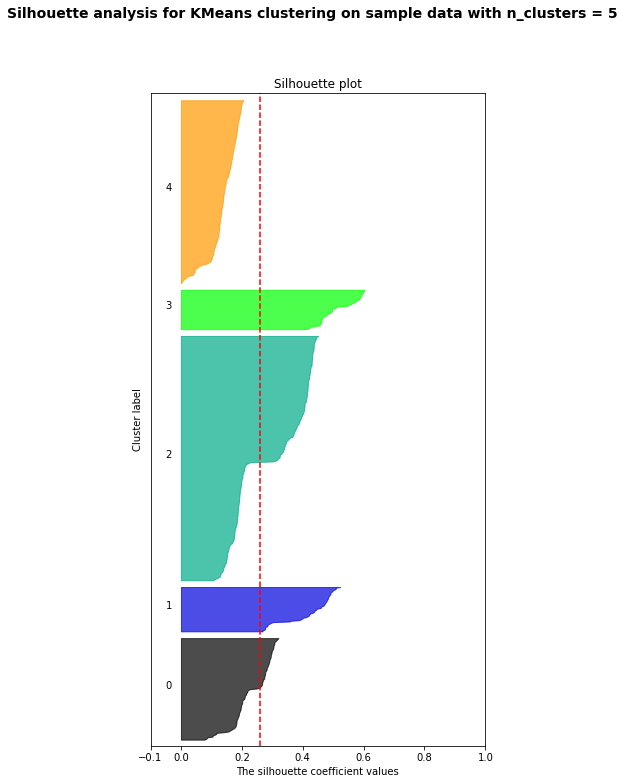

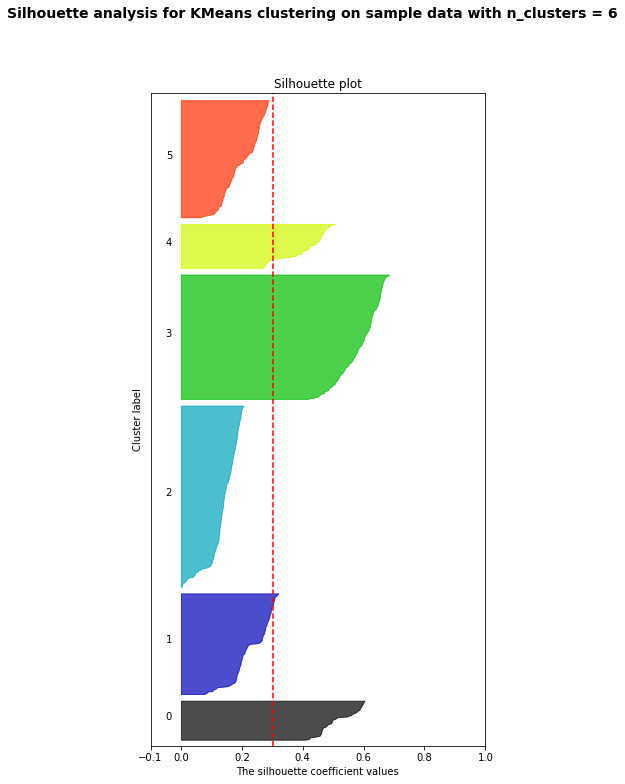

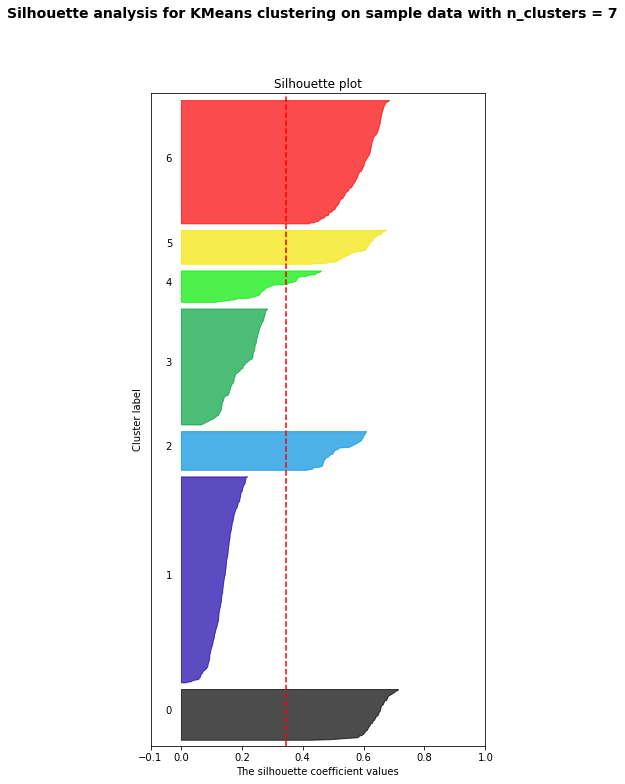

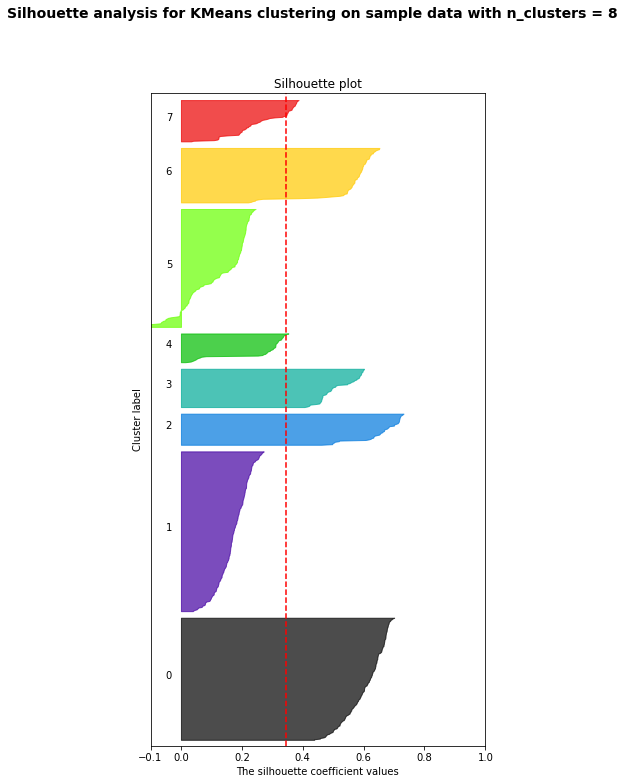

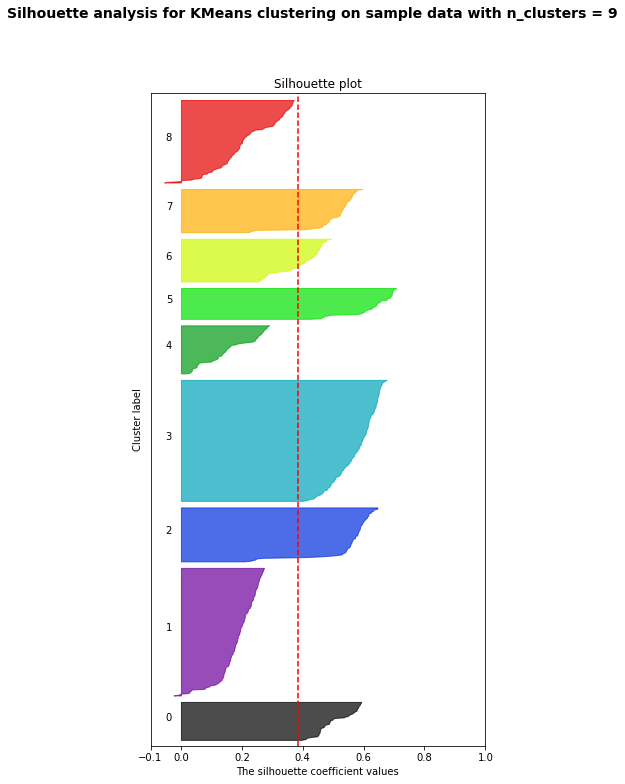

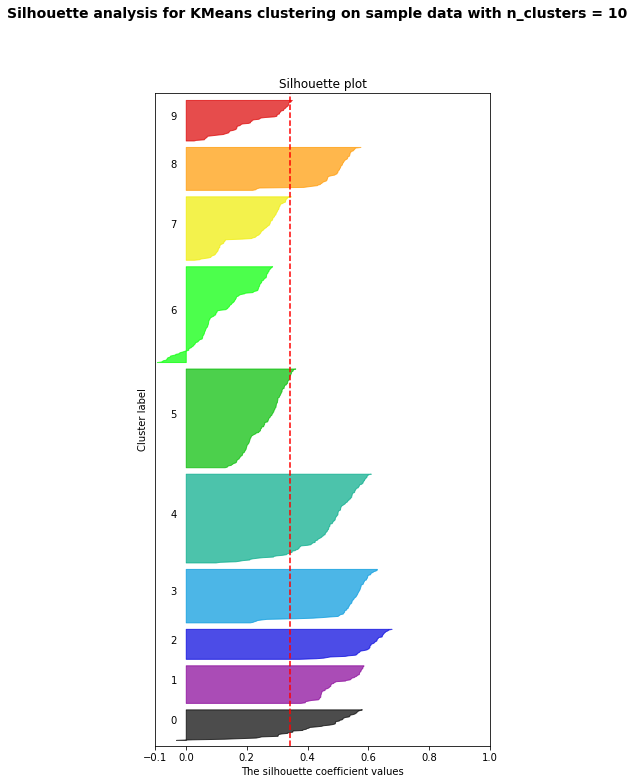

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

range_n_clusters = [5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(figsize=(6, 12))
    

    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    kmeans = KMeans(init="random", n_clusters=n_clusters, n_init=4)
    estimator = make_pipeline(MinMaxScaler(), kmeans).fit(X)
    cluster_labels = estimator.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("Silhouette plot")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()